<a href="https://colab.research.google.com/github/carlosemiliorabazo/APRENDIZAJE_AUTOMATICO_23_24/blob/main/ALGORITMO%20GENETICO/Problema_Sencillo_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmos Genéticos ----------------------------------

* Técnicas de **optimización metaherísticas**, **estocásticas** o **probabilísticas** (Holland-1962-1965-1992 y Goldberg-2006)
* **Computacionalmente intensivos** de ahí el tiempo que pasó desde su propuesta en 1962 hasta su aplicación en problemas de ingeniería reales (1992)
* Realiza una **búsqueda guiada** a partir de un conjunto inicial de posibles soluciones (**Población Inicial**) y va **evolucionando** a mejor en cada iteración del algoritmo (**generaciones**)
* Normalmente, las últimas generaciones contienen la mejor o las mejores soluciones al problema de optimización
* Cada **posible solución** se conoce como **individuo** y cada individuo **codifica** las variables independientes del problema de optimización. Estas variables representan los **genes** de la cadena **cromosomática** que representa a cada individuo
* Las **modificaciones genéticas** que hacen que los individuos se **adapten** mejor al medio, tienen **mayor probabilidad de perdurar en el tiempo**
* La **adaptación al medio** se realiza mediante la **función que queremos optimizar** (**función objetivo**, **función de evaluación** o **fitness function**). Llamaremos **fitness** a la **calidad** o **desempeño** de un individuo
* Pasar de un problema de **maximización** a uno de **minimización** es tan sencillo como **multiplicar** por **-1** el **resultado de la función objetivo**
* En cada iteración, **nuevos individuos** (**descendientes** u **offsprings**) son creados mediante **operaciones genéticas** dando lugar a nuevas poblaciones
* Operaciones genéticas: **Selección**, **Cruce** y **Mutación**


### ¿Porqué decidimos usar una **optimización metaheurística** (**no** garantizan la obtención de una solución óptima) en lugar de un **método exacto** (garantizan la obtención de una solución óptima)?

No es una pregunta fácil de responder. Se usa para problemas de **gran complejidad**:
* Gran **cantidad** de **variables**
* Gran **complejidad** de las **ecuaciones**
* Nos llegamos a preguntar si el problema tendrá solución

No siempre podemos encontrar un método exacto que permita resolver nuestro problema, y si lo hay, es posible que su **aplicación** **no** sea **viable** para un problema de cierta complejidad por el **tiempo** de **resolución** o **consumo** de **recursos**. (Una búsqueda extensiva para un problema combinatorio de algunos cientos de variables, puede tardar meses o años)

Además, las estratégias de **resolución analíticas**, como los **métodos basados en el gradiente** , pueden **converger a óptimos locales** y no alcanzar el óptimo global del problema

### Cómo decidir la estrategia para abordar un problema
1. **Cómo de grande es mi problema**: Estimar tiempo de una búsqueda **extensiva** a partir del tiempo necesario para evaluar una única solución
2. **Que rapidez necesito para obtener una solución**: A veces horas es aceptable, pero no meses...
3. **Cuantas restricciones hay**: A más restricciones, menos probable es que nos interese un método analítico exacto
4. **Precisión que necesito en los resultados**: A veces es preferible rapidez y aproximación antes que lentitud y total precisión.

### Qué necesitamos para resolver Algoritmos Genéticos con Python

Utilizaremos la librería de Python **`deap`** [Documentación de deap](https://deap.readthedocs.io/en/master/)

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.5 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

In [3]:
!pip install numpy

In [4]:
!pip install scipy

Necesitamos también la librería de Python de **multiprocesamiento** (mecanismo de **paralelización**) **`SCOOP`** [Enlace al GitHub de SCOOP](https://github.com/soravux/scoop)

In [5]:
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78113 sha256=00fd964608833c6468a3e11ac3ba43602633c221ded9e40a35ee081e012fc618
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


### RESOLUCIÓN DE UN PROBLEMA SENCILLO ---------------------------------------

Se desea encontrar el **máximo** de la función:
$$f(x,y) = \sqrt{x^2 + y^2}$$
En el dominio $$\{x,y\} \in [-100,100]$$

En este problema, la cadena cromosomática estaría formada por dos genes (cromosomas), que, al confinarse en forma de lista, quedaría como $$[x_i, y_i]$$ con $$i = 1, 2, ... , n$$

La **población** del algoritmo **no cambia de tamaño** a lo largo de las generaciones, con lo que **n** será **constante**

La población inicial se **elige de forma aleatoria** porque queremos **diversidad genética**

In [6]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

#### NOTA SOBRE NÚMEROS ALEATORIOS --------------------------

Queremos generar números aleatorios entre -100 y 100 (sin incluir a estos). Podemos usar el módulo nativo random de generación de números pseudoaleatorios [Documentación librería random](https://docs.python.org/3/library/random.html) y `numpy.random`(para generación de vectores psudoaleatorios) [Documentación numpy.random](https://docs.scipy.org/doc/numpy-1.16.1/reference/routines.random.html). Recordad que los números totalmente aleatorios no existen en programación.

Utilizamos, además, el método `uniform`: [Documentación método uniform](https://docs.python.org/3.6/library/random.html)

In [7]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla,
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios en 2 list comprenhension
# para encapsular todos los datos en las listas x e y
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Otra posibilidad es generar dos vectores de diez valores comprendidos entre -100 y 100, con una forma (1,10) (1 fila y 10 columnas). Serían dos vectores de tipo fila con diez valores

In [8]:
import numpy as np
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
# Son los mismos mientras no cambiemos la semilla
# Numpy genera directamente los vectores
z = np.random.uniform(-100, 100, 10).reshape(1, 10)
t = np.random.uniform(-100, 100, 10).reshape(1, 10)
print('z= ', z)
print('t= ', t)

z=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
t=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


Hay que tener en cuenta que las soluciones deben ser válidas y una solución sería **no válida** si alguna de las variables independientes se saliera de los **rangos establecidos**. Es común en los problemas de optimización tener restricciones en las variables, por lo que siempre tendremos que **comprobar la validez de nuestras soluciones**

#### ------------------------------------------------------------------

#### NOTA 2: ESPACIO DE BÚSQUEDA O DOMINIO DE LA SOLUCIÓN -

Sabemos que las 4 soluciones óptimas para nuestro problema de ejemplo son:

|Individuo|x|y|
|-|-|-|
|1|100|100|
|2|-100|100|
|3|100|-100|
|4|-100|-100|

Vamos a resolverlo con Algoritmo Genético como ejercício, aunque cualquier algoritmo de optimización basado en gradiente de los que vienen incluidos en el módulo `optimize` de `scipy`([módulo optimize en scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)) nos valdría para obtener una solución a nuestro problema de manera sencilla, ya que nuestra función es **convexa**

Recordar que: Los AGs se deben emplear en **problemas de optimización** en los que la solución óptima **no se conozca** y ni siquiera tengamos una **aproximación** a la misma o incluso **ni siquiera se tenga la certeza** de que podamos obtenerla.

Aunque el **uso de AGs no nos da certeza de obtener la solución óptima**, si obtendremos una solución **bastante buena** y en un **tiempo razonable**. Siempre vamos a terminar con una solución al problema que **será mejor que realizar una búsqueda totalmente aleatoria**

##### Visualicemos nuestra función

In [9]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [10]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = np.sqrt(x[0]**2 + x[1]**2)
    return res

[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [11]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
print('x= ', x)
print('y= ', y)

x=  [-100.          -99.7997998   -99.5995996   -99.3993994   -99.1991992
  -98.998999    -98.7987988   -98.5985986   -98.3983984   -98.1981982
  -97.997998    -97.7977978   -97.5975976   -97.3973974   -97.1971972
  -96.996997    -96.7967968   -96.5965966   -96.3963964   -96.1961962
  -95.995996    -95.7957958   -95.5955956   -95.3953954   -95.1951952
  -94.99499499  -94.79479479  -94.59459459  -94.39439439  -94.19419419
  -93.99399399  -93.79379379  -93.59359359  -93.39339339  -93.19319319
  -92.99299299  -92.79279279  -92.59259259  -92.39239239  -92.19219219
  -91.99199199  -91.79179179  -91.59159159  -91.39139139  -91.19119119
  -90.99099099  -90.79079079  -90.59059059  -90.39039039  -90.19019019
  -89.98998999  -89.78978979  -89.58958959  -89.38938939  -89.18918919
  -88.98898899  -88.78878879  -88.58858859  -88.38838839  -88.18818819
  -87.98798799  -87.78778779  -87.58758759  -87.38738739  -87.18718719
  -86.98698699  -86.78678679  -86.58658659  -86.38638639  -86.18618619
  -85.9

[numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

[numpy.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)

[numpy.c_](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)

In [12]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

[matplotlib.pyplot.gca](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html)

Text(0.5, 0, 'f(x,y)')

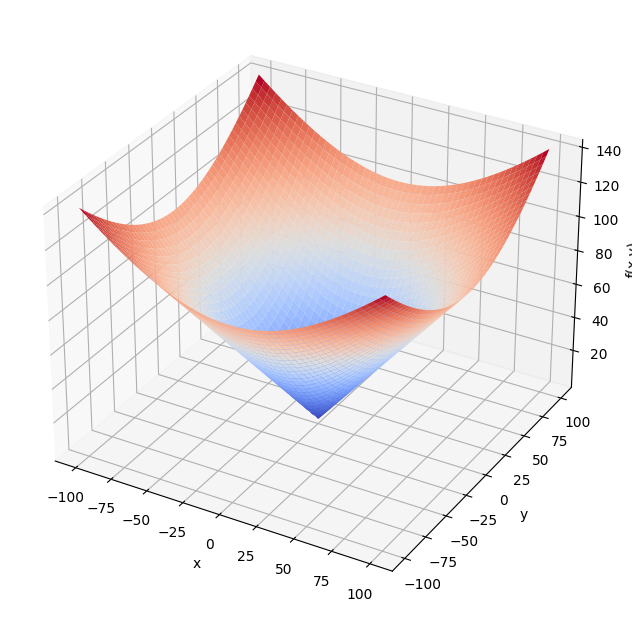

In [14]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

#### ------------------------------------------------------------------

A partir de ahora veremos los siguientes pasos:
1. Definición del problema y generación de la población inicial
- 1.1 Creación del problema
- 1.2 Creación de la plantilla del individuo
- 1.3 Crear individuos aleatorios y población inicial
2. Función objetivo y operadores genéticos
- 2.1 Función objetivo
3. Incorporación de los operadores genéticos
4. Últimos pasos: Algortimo Genético como caja negra
- 4.1 Configuración algoritmo genético
- 4.2 Resultados del algoritmo genético
5. ¿Cómo conseguir resultados consistentes?
6. Convergencia del algoritmo
7. Para seguir aprendiendo

#### 1. Definición del problema y generación de la población inicial

Se importan las librerías necesarias

In [15]:
import random
from deap import base
from deap import creator
from deap import tools

##### 1.1 Creación del problema ---------------------------------------------

Creamos los objetos para **definir el tipo de problema de optimización** (maximizar o minimizar), con el método `create` de la clase `creator`. Crea una nueva clase llamada `name=FitnessMax` (podría ser otro), que hereda de `base=base.Fitness` y que tiene un atributo llamado `attribute=weights` que se añadirá a la clase cuando esta se cree (opcional) y que determina el tipo de problema de optimización que estamos definiendo (contiene una tupla con tantas componentes como objetivos tenga el problema y con un valor que indica si es maximización o minimización). En nuestro caso, un solo objetivo y maximización (porque 1.0 es positivo). El objeto `base.Fitness` contiene los atributos encargados de almacenar el **fitness** o desempeño de un individuo y otros [atributos de base.Fitness](https://deap.readthedocs.io/en/master/api/base.html#deap.base.Fitness), que los heredará nuestra nueva clase `FitnessMax`:
* `values`: Una tupla con los valores de **fitness** de cada uno de los objetivos de nuestro problema. Contiene, por tanto, la calidad de cada individuo en cada uno de los objetivos de nuestro problema
* `dominates`: Devuelve `True` si una solución es estrictamente peor que otra (tiene sentido en AGs de varios objetivos)
* `valid`: Indica si el **fitness** de un individuo es válido. Se usa para saber el número de individuos que se tienen que evaluar en cada iteración. Si un individuo tiene el atributo `values` vacío, el atributo `valid` será `False`.

In [16]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

Lo que realmente hemos hecho es:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class FitnessMax(base.Fitness):
  weights = (1.0,)
```

##### 1.2 Creación de la plantilla del individuo ---------------------------------------------

Creamos el **tipo de individuo** (el tipo de objeto de Python o plantilla que va a contener el individuo (lista, vector, etc)
y sus atributos. Creamos la clase `Individual` que hereda de la clase `list` [listas en Python](https://docs.python.org/3/tutorial/datastructures.html) y que contiene el atributo `fitness` inicializado con el objeto `FitnessMax`: Un individuo es una lista con un atributo que almacenará la calidad o desempeño de si mismo

In [17]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class MaxFitness(base.Fitness):
  weights = (1.0,)

# Generamos la clase Individual
class Individual(list)
  fitness = MaxFitness
```

##### 1.3 Crear individuos aleatorios y población inicial ---------------------------------------------

Definición del **objeto caja de herramientas** o `Toolbox` [Toolbox](https://deap.readthedocs.io/en/master/api/base.html#toolbox) que contendrá, mediante
**registro**, un conjunto de funciones utilizadas por el algoritmo durante
su ejecución, como suelen ser:
* Función para **crear los individuos** de forma **aleatoria**
* Función para **crear la población**
* **Operadores genéticos** (selección, cruce y mutación)
* Función **objetivo**

In [18]:
toolbox = base.Toolbox()

En el `Toolbox` registraremos funciones necesarias para ejecutar el AG, a través del método `register` de la clase `base.Toolbox` que tiene los atributos:
* `alias`: El nombre con el que registramos la función en el `Toolbox`
* `function`: La función que estamos registrando
* `argument`: Los argumentos que se pasan a la función

Registramos la función `attr_uniform` (Que será un método de la clase `toolbox`) que permite **crear individuos aleatorios** desarrollando una función (usaremos `random.uniform`) que nos permita generar un valor aleatorio para cada variable independiente (cada gen del comosoma), esto es, cada una de las posiciones de la lista con valores sujetos a las restricciones de nuestro problema (-100, 100)

In [19]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [20]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

Si se quiere detalle de como hace esto Python, investigar el método `partial` del módulo nativo `functools`: [functools](https://docs.python.org/3/library/functools.html)

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
import random

# Definimos la función correspondiente
def funcion(a=-100, b=100):
  return random.uniform(a,b)

# Definimos la clase
class Toolbox(object)
  attr_uniform = function
```

Creamos el individuo completo llamando a la función que genera cada uno de los individuos tantas veces como variables independientes tengamos. Eso lo hacemos registrando la función `individual` que, a su vez, llama a la función `tools.initRepeat` que tiene los siguientes parámetros:
* `container`: Tipo de dato donde se almacenará el resultado del argumento `func` -> En nuestro caso, la clase `creator.individual` creada anteriormente
* `func`: Función a la que se llamará `n` veces -> En nuestro caso `toolbox.attr_uniform` creada anteriormente para crear cada gen
* `n`: Número de veces que se llamará a la función `func`-> En nuestro caso 2 cromosomas a crear


In [21]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [22]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [23]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

El procedimiento para **crear una población** es análogo a la creación de un individuo:

In [24]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 32)

 Como se puede ver, se registra la función `population` que utiliza `initRepeat` para llamar 32 veces a la función `Individual` (una vez por cad individuo que formará la población inicial). El resultado se guarda en una `list` que contiene la población inicial generada. Se recomienda elegir números **divisibles entre 4**, ya que algunas operaciones genéticas del módulo `deap` pueden dar problemas si no se cumple este requisito

In [25]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [26]:
# Cada individuo tiene 2 componentes
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [27]:
poblacion[0].fitness.values

()

Respecto al **tamaño de la población**, en este caso, el criterio que seguiremos es que, como mínimo, sea de **un orden de magnitud** superior al **número de variables independientes** y como máximo 2 * ese orden de magnitud. En nuestro caso, hay dos variables independientes (población entre 20 y 40 individuos)

#### 2. Función objetivo y operadores genéticos

Ahora crearemos nuestra **función objetivo** y la **registraremos** en nuestro `Toolbox`

##### 2.1 Función Objetivo ---------------------------------------------

Dividimos funciones objetivo en:
* F.O. codificadas en Python: [math](https://docs.python.org/3.6/library/math.html) o [scipy](https://docs.scipy.org/doc/scipy) (en nuestro ejemplo lo haremos así)
* F.O. que llaman a un programa externo para obtener el desempeño del individuo, para modelo muy complejos: [módulo nativo os](https://docs.python.org/3/library/os.html) o [módulo subproccess](https://docs.python.org/3.6/library/subprocess.html) (no lo usaremos en nuestro ejemplo)


In [28]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = math.sqrt(x[0]**2 + x[1]**2)
    return res,

Si una solución **no cumple las restricciones** (una de las dos variables independientestoma valores fuera del dominio de la función) debe ser **descartada** (devolvemos -1). A esto se le llama **aplicar la pena de muerte**.

Al tratarse de una función de **maximización** las soluciones válidas solo aportarán valores de la función objetivo **positivas** y, por lo tanto, un -1 **penaliza totalmente el resultado**. La **pena de muerte** hace que **un individuo no participe en las operaciones de cruce y mutación** y, por lo tanto, **sus genes no se utilizarán para generar las siguientes generaciones**

Ahora, **registramos la función de fitness**

In [29]:
toolbox.register("evaluate", funcion_objetivo)

In [30]:
# Ejemplo de uso 1
funcion_objetivo(individuo)

(92.06402390891836,)

In [31]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(92.06402390891836,)

No olvidar que la **función fitness devuelve una tupla** ya que la solución es generalista para un problema genérico **multiobjetivo**, aunque en nuestro caso solo sea uno

**IMPORTANTE!!:** Sed conscientes de la relevancia de **codificar de manera eficiente la función objetivo**. Se ejecutará un gran número de veces y cualquier ahorro de tiempo cuenta. **Evitar bucles** o **condiciones que puedan dejar colgado el algoritmo** (siempre que se pueda)

#### 3. Incorporar los operadores genéticos

* **Selección**:`selection`. Procedimiento por el cual se seleccionan los individuos que participarán en las operaciones de cruce y mutación. Procedimiento siempre **elitista**: Un individuo tendrá mayor probabilidad de dejar descendencia si su `fitness` es más adecuado al problema de optimización (razonamiento en línea con la teoría evolutiva de Darwin) -> Las probabilidades de dejar descendencia en las futuras generaciones crecen cuando crece la adaptación del individuo al medio. **OJO CON LOS SUPERINDIVIDUOS**
* **Cruce**: `mate`. Operación probabilística que permite que dos individuos seleccionados **crucen** o **intercambien** su información genética para crear dos nuevos individuos
* **Mutación**: `mutation`. Operación probabilística que permite que un individuo seleccionado **modifique** su información genética para crear un nuevo individuo.

Ni para la probabilidad de cruce ni para la de mutación existen valores óptimos que sirva para todos los problemas. Tendrán que ajustarse a cada problema.

Destacar que tanto el **cruce** como la **mutación** son el **motor para explorar y explotar zonas del espacio de búsqueda**.

![AGs.png](attachment:45d31de3-d523-4ad0-9e71-d264fd22a4b7.png)

La librería `deap` tiene **gran variedad de algoritmos** de **selección**, **mutación** y **cruce**, aunque también nosotros nos podemos crear nuestros propios algoritmos (no lo haremos). La aplicación de cada una de ellas dependerá del problema en cuestión. Para ver cual es la más adecuada para cada caso, consultar [Algoritmos de selección, mutación y cruce de deap](https://deap.readthedocs.io/en/master/api/tools.html?highlight=tools) (algunos sirven cuando se usan variables continuas, otras cuando se usan variables discretas, etc)

![Algoritmos Deap.png](attachment:f85b133f-b0c1-4fff-bd9c-5c8f1b55ff6f.png)

**CRUCE** ---------------------------------------------

In [32]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)

Utilizamos `cxOnePoint(ind1, ind2)` o cruce en un punto que ya conocéis [cxOnePoint](https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxOnePoint), selecciona de manera aleatoria un punto (una posición) dentro de los individuos **ind1**, **ind2** para hacer un intercambio entre la información genética de dos individuos (padres) seleccionados

![Cruce.png](attachment:5ef0b9e3-69c3-4286-b7d6-6b4d88ad6624.png)

En este caso, al ser la longitud de los individuos 2, solo existe un posible punto de cruce (el cruce será simplemente intercambiar los valores de x e y)

**MUTACIÓN** ---------------------------------------------

Utilizamos el operador `mutGaussian` (mutación Gaussiana) con una media de 0 y una deviación típica de 5 (son solo de ejemplo y no garantizan ser los más adecuados. Posiblemente habrá que probar valores distintos)

In [33]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

`MutGaussian(individual, mu, sigma, indpb)` [MutGaussian](https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.mutGaussian) consiste en mutar, con una probabilidad `indpb` cada uno de los genes del individuo `individual`, sumando a cada uno de ellos una cierta cantidad aleatoria. Esta cantidad se genera según una función de probabilidad Gaussiana (o normal), de media `mu` y desviación típica `sigma`

![Gauss.png](attachment:3285c96e-9f38-49c1-a707-c8e8da282c0a.png)

En el caso de la mutación, se deben definir dos probabilidades:
* La probabilidad de mutar un individuo (lo veremos más adelante)
* La probabilidad  de mutar cada uno de los genes del individuo (`indpb`)
Este último valor, en general, debe ser bajo para que la mutación no modifique en exceso al individuo. Valores muy altos de esta probabilidad pueden hacer que el algoritmo no converja correctamente, o que no se intensifiquen ciertas zonas del espacio de búsqueda.

**SELECCIÓN** ---------------------------------------------

In [34]:
toolbox.register("select", tools.selTournament, tournsize=3)

Hemos usado el operador `selTournament(individuals, k, tournsize)` que nos permite realizar una **selección mediante torneo**. En este caso fijamos un tamaño igual a 3. Se ha demostrado que este tamaño funciona relativamente bien para la mayoría de los casos [Lones 2011](https://cs.gmu.edu/~sean/book/metaheuristics/Essentials.pdf)

`selTournament` funciona de la siguiente forma [Detalle de SelTournament](https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.selTournament):
1. Se selecciona de manera aleatoria un número `tournsize` de individuos de la población `individuals`
2.  En cada selección existen reemplazos por lo que un individuo puede ser seleccionado varias veces en un mismo torneo
3. Los individuos seleccionados compiten entre ellos para ganar el torneo utilizando el desempeño obtenido por cada uno al evaluar la función de `fitness`
4. El individuo con mejor desempeño es el que ganará el torneo, y será quien participe en las operaciones genéticas
5. Este proceso se repite hasta seleccionar un total de `k` individuos

![tournament.png](attachment:4b618212-6d43-411c-aabf-cb428cf3876d.png)

El algoritmo realiza **tantos torneos como individuos tiene la población**. Aunque 3 es válido para la mayoría de los casos, cuando la población crece mucho, se deben utilizar **tamaños más altos** para **hacer más rápida la convergencia** del algoritmo. La **selección con torneo** es **muy elitista** y hace que el algoritmo converja más rapidamente que, por ejemplo, con el algoritmo de la ruleta. Las **funciones** se han registrado con `register` con los `alias`: `mate`, `mutate` y `select` que **no deben modificarse** ya que son usados por la función del módulo `algorithms` que implementa el Algortimo Genético. Pasa lo mismo con la función objetivo `evaluate`. **No debe cambiarse el alias**

#### 4. Últimos pasos: Algoritmo genético como una caja negra

Ahora veremos como **configurar el algoritmo genético** y la **representación de los resultados** del algoritmo.

##### 4.1 Configuración del Algoritmo Genético ---------------------------------------------

Definimos la función `main()` que realizará toda la **configuración** del algoritmo

In [35]:
# Definimos la semilla del generador de números aleatorios
# Se hace así para tener resultados reproducibles
random.seed(42)

In [36]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
CXPB, MUTPB, NGEN = 0.5, 0.2, 20

In [37]:
#Generamos la Población Inicial
pop = toolbox.population()
pop

[[27.885359691576753, -94.99784895546661],
 [-44.99413632617615, -55.35785237023545],
 [47.29424283280247, 35.33989748458225],
 [78.43591354096907, -82.61223347411678],
 [-15.61563606294591, -94.04055611238593],
 [-56.27240503927933, 1.0710576206724767],
 [-94.69280606322728, -60.2324698626703],
 [29.976887555904653, 8.98829612064334],
 [-55.911875591860664, 17.85313677518174],
 [61.88609133556534, -98.7002480643878],
 [61.163850366561576, 39.62787899764538],
 [-31.949896696401623, -68.90410003764369],
 [91.44261444135623, -32.68109097747465],
 [-81.45083132397042, -80.65672463330719],
 [69.49887326949195, 20.745206273378216],
 [61.42565465487604, 45.94635733876359],
 [7.245618290940143, 94.62315279587412],
 [-24.29312455832931, 10.408126254645396],
 [65.88093285059898, 23.703950472849215],
 [72.34138006215545, 15.470429051352411],
 [40.914367242984696, -90.83512326886756],
 [-54.42034486969063, -42.12240727957857],
 [-84.04160461527451, -53.44182272779396],
 [-79.79971411805417, -44.4

In [38]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
hof = tools.HallOfFame(1)
hof

In [39]:
print(hof)

[]


El método `HallOfFame` [Clase HallOfFame](https://deap.readthedocs.io/en/master/api/tools.html#hall-of-fame) recibe dos parámetros:
* `maxsize`: Nº individuos a almacenar
* `similar`: Función para comparar si dos individuos son iguales. Si no se pone nada, utilizará el método `operator.eq` del módulo `operator` [Módulo Operator](https://docs.python.org/3/library/operator.html#operator.eq)

Este es el **mecanismo** que implementa `deap` **para no perder al mejor individuo** a lo largo de la evolución del algoritmo, ya que con el algoritmo`eaSimple` se podría perder al mejor individuo debido a los operadores genéticos.

La clase `HallOfFame` está definida en el submódulo `tools` y **en cada generación** del algoritmo genético el objeto `hof` es **actualizado** mediante el método `update` (transparente a nosotros), que recibe como **entrada** la **población actual** y actualiza el contenido del objeto `hof`

In [40]:
# Definimos un objeto para generar las estadísticas de la
# población a lo largo de las generaciones del algoritmo
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

La clase `Statistics` se encuentra definido en el submódulo `tools` [Clase Statistics](https://deap.readthedocs.io/en/master/api/tools.html#statistics)

Ahora registramos en el objeto `stats` las funciones estadísticas a utilizar junto con su alias:

In [41]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

[Función media](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)

[Función desviación estandar](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html?highlight=numpy%20std#numpay.std)

[Función mínimo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html?highlight=numpy%20min#numpay.ndarray.min)

[Función máximo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html?)

El objeto `stats` tiene un método `compile` [Método Compile](https://deap.readthedocs.io/en/master/tutorials/basic/part3.html), que recibe como entrada la población que permite generar las estadísticas. A este método se le llama internamente en cada generación del algoritmo.

**ESTAMOS EN DISPOSICIÓN DE PODER EJECUTAR EL ALGORITMO GENÉTICO** ---------------------------------------------

En `deap` tenemos una ámplia gama de algoritmos en el submódulo `algorithms` [Submódulo Algorithms](https://deap.readthedocs.io/en/master/api/algo.html), en nuestro caso, usaremos `eaSimple` que es una de las versiones más simples y que realizará lo siguiente:

1. Evaluará la población inicial
2. Mientras no se alcance el límite de generaciones:
    1. Selección de individuos para participar en las operaciones genéticas
    2. Creación de la siguiente generación mediante cruce y/o mutación de los individuos seleccionados
    3. Evaluación de la generación creada

Además, el algoritmo `eaSimple`, devolverá la **población final** y el **registro de evolución** y tendrá como **parámetros de entrada**:
* `population` : Población inicial
* `toolbox` : La caja de herramientas con todas las funciones necesarias
* `cxpb` : Probabilidad de cruce en tanto por uno
* `mutpb` : Probabilidad de mutación en tanto por uno
* `ngen` : Nº de generaciones del algoritmo
* `stats` : Objeto estadístico con las funciones registradas (opcional)
* `halloffame` : Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
* `verbose` : Si se deben mostrar o no las estadísticas de cada generación

In [42]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

In [43]:
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	32    	77.4361	25.1119	26.4289	116.497
1  	19    	96.4883	22.7128	31.9797	135.753
2  	27    	112.689	17.4287	66.3743	139.022
3  	17    	126.311	7.47741	107.958	139.022
4  	20    	133.989	3.86947	123.191	139.022
5  	19    	136.773	2.2418 	131.216	139.022
6  	18    	138.523	0.984614	135.518	139.022
7  	17    	139.048	0.143654	139.022	139.847
8  	20    	138.835	1.15547 	132.457	139.847
9  	13    	134.645	24.3715 	-1     	139.847
10 	20    	139.228	0.357508	139.022	139.847
11 	21    	135.033	24.4356 	-1     	139.847
12 	18    	139.641	0.357508	139.022	139.847
13 	23    	139.598	0.824322	135.476	139.847
14 	18    	135.314	24.4937 	-1     	139.847
15 	18    	139.847	0       	139.847	139.847
16 	19    	135.446	24.5064 	-1     	139.847
17 	17    	139.847	0       	139.847	139.847
18 	28    	135.277	24.4941 	-1     	139.847
19 	18    	135.446	24.5064 	-1     	139.847
20 	22    	130.794	34.0467 	-1     	139.847


In [44]:
print(pop)

[[97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [100.69014625521163, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -102.127284776753], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -91.15745011240782], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731904, -99.85981097553889], [97.90467012731

In [45]:
print(logbook)

gen	nevals	avg    	std     	min    	max    
0  	32    	77.4361	25.1119 	26.4289	116.497
1  	19    	96.4883	22.7128 	31.9797	135.753
2  	27    	112.689	17.4287 	66.3743	139.022
3  	17    	126.311	7.47741 	107.958	139.022
4  	20    	133.989	3.86947 	123.191	139.022
5  	19    	136.773	2.2418  	131.216	139.022
6  	18    	138.523	0.984614	135.518	139.022
7  	17    	139.048	0.143654	139.022	139.847
8  	20    	138.835	1.15547 	132.457	139.847
9  	13    	134.645	24.3715 	-1     	139.847
10 	20    	139.228	0.357508	139.022	139.847
11 	21    	135.033	24.4356 	-1     	139.847
12 	18    	139.641	0.357508	139.022	139.847
13 	23    	139.598	0.824322	135.476	139.847
14 	18    	135.314	24.4937 	-1     	139.847
15 	18    	139.847	0       	139.847	139.847
16 	19    	135.446	24.5064 	-1     	139.847
17 	17    	139.847	0       	139.847	139.847
18 	28    	135.277	24.4941 	-1     	139.847
19 	18    	135.446	24.5064 	-1     	139.847
20 	22    	130.794	34.0467 	-1     	139.847


Agrupamos todo lo anterior en la función `main()` que realizará toda la **configuración** del algoritmo

In [46]:
def main():
    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(42)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20

    #Generamos la Población Inicial
    pop = toolbox.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats
    # las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook

##### 4.2 Resultados del Algoritmo Genético ---------------------------------------------

In [47]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])

gen	nevals	avg    	std    	min    	max    
0  	32    	77.4361	25.1119	26.4289	116.497
1  	19    	96.4883	22.7128	31.9797	135.753
2  	27    	112.689	17.4287	66.3743	139.022
3  	17    	126.311	7.47741	107.958	139.022
4  	20    	133.989	3.86947	123.191	139.022
5  	19    	136.773	2.2418 	131.216	139.022
6  	18    	138.523	0.984614	135.518	139.022
7  	17    	139.048	0.143654	139.022	139.847
8  	20    	138.835	1.15547 	132.457	139.847
9  	13    	134.645	24.3715 	-1     	139.847
10 	20    	139.228	0.357508	139.022	139.847
11 	21    	135.033	24.4356 	-1     	139.847
12 	18    	139.641	0.357508	139.022	139.847
13 	23    	139.598	0.824322	135.476	139.847
14 	18    	135.314	24.4937 	-1     	139.847
15 	18    	139.847	0       	139.847	139.847
16 	19    	135.446	24.5064 	-1     	139.847
17 	17    	139.847	0       	139.847	139.847
18 	28    	135.277	24.4941 	-1     	139.847
19 	18    	135.446	24.5064 	-1     	139.847
20 	22    	130.794	34.0467 	-1     	139.847
Mejor fitness: 139.847439
Mejor individ

**CUESTIONES** ---------------------------------------------

Datos que corresponden a las funciones registradas en el objeto `stats`
* `gen`: Generación en la que me encuentro
* `nevals`: Número de individuos que han sido evaluados respecto a su desempeño
    * No es igual al número de individuos porque los operadores de cruce y mutación son probabilísticos (un individuo seleccionado puede no haberse modificado y no será, por tanto, evaluado, ahorrando operaciones redundantes). Cuando un individuo **es modificado** debido a un operación de genética (cruce o mutación), su `fitness` se invalida, poniendo el atributo `valid=False`. En cada generación, todos los individuos que tienen un `fitness` **inválido** serán evaluados.
* `avg`: Desempeño medio de la población
    * Se incrementa a lo largo de las generaciones. **Positivo** porque los **individuos** que forman la población son, en media, **mejores**
* `std`: Desviación típica del desempeño medio de la población
    * Disminuye, en general, a lo largo de las generaciones. **Positivo** porque los **individuos** que forman la población son, **cada vez más parecidos** y que el algoritmo es **elitista** por el proceso de selección
* `min`: Mínimo desempeño de la población
* `max`: Máximo desempeño de la población
    * Aumenta a lo largo de las generaciones. **Muy positivo** porque indica que el algoritmo funciona correctamente
    

Aunque `hof` lo hemos definido para que almecene solo un individuo, el objeto es una secuencia (como una lista en Python) por lo que para obtener el individuo o el `fitness` debemos usar el índice cero.


Al A.G. nos ha proporcionado en tan solo unos pasos una solución que es bastante buena - no es la mejor, pero está muy cerca.



In [48]:
print(log)

gen	nevals	avg    	std     	min    	max    
0  	32    	77.4361	25.1119 	26.4289	116.497
1  	19    	96.4883	22.7128 	31.9797	135.753
2  	27    	112.689	17.4287 	66.3743	139.022
3  	17    	126.311	7.47741 	107.958	139.022
4  	20    	133.989	3.86947 	123.191	139.022
5  	19    	136.773	2.2418  	131.216	139.022
6  	18    	138.523	0.984614	135.518	139.022
7  	17    	139.048	0.143654	139.022	139.847
8  	20    	138.835	1.15547 	132.457	139.847
9  	13    	134.645	24.3715 	-1     	139.847
10 	20    	139.228	0.357508	139.022	139.847
11 	21    	135.033	24.4356 	-1     	139.847
12 	18    	139.641	0.357508	139.022	139.847
13 	23    	139.598	0.824322	135.476	139.847
14 	18    	135.314	24.4937 	-1     	139.847
15 	18    	139.847	0       	139.847	139.847
16 	19    	135.446	24.5064 	-1     	139.847
17 	17    	139.847	0       	139.847	139.847
18 	28    	135.277	24.4941 	-1     	139.847
19 	18    	135.446	24.5064 	-1     	139.847
20 	22    	130.794	34.0467 	-1     	139.847


#### 5. ¿Cómo conseguir resultados consistentes?

Buenas prácticas a llevar a cabo para mejorar el modelo:
* Aumentar la población hasta que no veamos mejoras significativas probando con pocas generaciones e ir aumentando el número de individuos
* Aumentar el número de generaciones y comprobar que el algoritmo converja mostrando una gráfica de convergencia del algoritmo
* Hacer un barrido de valores de probabilidades de cruce y mutación, y mostrar algunas estadísticas para ver de qué manera afectan dichas probabilidades

Ahora lanzamos el Algoritmo Genético 20 veces

In [49]:
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [50]:
# Inicializamos la lista de las soluciones. Almacenaremos el fitness
# del mejor individuo de cada intento del algoritmo genético
lista_mejores = list()

# Lancamos el algoritmo 20 veces
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Al terminar el bucle, calculamos
# la mediay el mejor resultado de todos los intentos
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg    	std    	min    	max    
0  	32    	74.4806	26.1253	17.3208	126.645
1  	21    	88.0266	22.4865	21.376 	126.645
2  	17    	106.006	16.9455	79.778 	127.551
3  	26    	114.558	20.6497	37.2162	139.286
4  	21    	127.228	4.66593	118.291	139.286
5  	15    	130.741	5.02507	124.196	139.286
6  	16    	131.424	24.081 	-1     	139.286
7  	18    	133.774	24.3027	-1     	139.722
8  	26    	139.326	0.200697	138.844	139.722
9  	20    	135.079	24.4414 	-1     	139.722
10 	13    	135.256	24.4729 	-1     	139.722
11 	21    	139.722	0       	139.722	139.722
12 	16    	135.324	24.4846 	-1     	139.722
13 	15    	139.722	0       	139.722	139.722
14 	15    	139.722	0       	139.722	139.722
15 	21    	135.324	24.4846 	-1     	139.722
16 	23    	139.722	0       	139.722	139.722
17 	23    	135.288	24.4789 	-1     	139.722
18 	23    	139.74 	0.0983789	139.722	140.287
19 	13    	139.729	0.213297 	138.817	140.287
20 	19    	139.863	0.244834 	139.722	140.287
gen	nevals	avg    	std    	min   	max 

#### 6. Convergencia del algoritmo

A partir del objeto `Logbook` [Objeto Logbook](https://deap.readthedocs.io/en/master/api/tools.html#logbook) que contiene todos los datos de evolución del algoritmo, desarrollamos la función `plot_evolution` para analizar la convergencia representando la evolución del Algoritmo Genético:

In [51]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

Pintamos la Gráfica:

gen	nevals	avg    	std    	min    	max    
0  	8     	79.8039	27.9145	31.2954	113.917
1  	2     	106.772	8.01216	95.3282	113.917
2  	4     	113.296	6.74022	98.8946	125.664
3  	4     	118.271	5.72858	113.506	125.664
4  	4     	124.196	3.8852 	113.917	125.664
5  	4     	125.664	0      	125.664	125.664
6  	6     	126.382	1.89989	125.664	131.409
7  	4     	125.64 	2.92056	119.728	131.409
8  	3     	127.819	2.78115	125.664	131.409
9  	3     	130.691	1.89989	125.664	131.409
10 	3     	131.409	0      	131.409	131.409
11 	6     	131.409	0      	131.409	131.409
12 	6     	131.409	0      	131.409	131.409
13 	5     	131.409	0      	131.409	131.409
14 	6     	132.05 	1.69633	131.409	136.538
15 	6     	133.625	3.0365 	128.617	136.538
16 	4     	135.772	1.6813 	131.409	136.538
17 	2     	136.538	0      	136.538	136.538
18 	6     	136.538	0      	136.538	136.538
19 	4     	136.538	0      	136.538	136.538
20 	4     	136.538	0      	136.538	136.538
Mejor fitness: 136.538209
Mejor individuo [-94.6928060

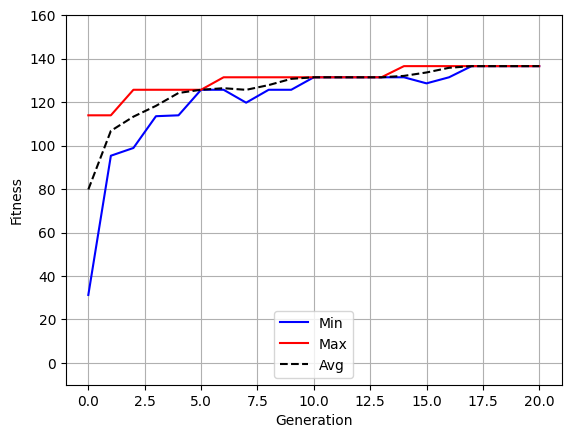

In [52]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 8)
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Dilema de la **exploración** vs la **explotación**: ¿Qué mecanismo u operadores genéticos favorecen la exploración cuales la explotación?. La respuesta a esta cuestión no está clara y es un **tema en discusión** en la literatura especializada. **La mezcla de selección, cruce y mutación generan exploración y explotación**

**CÓDIGO COMPLETO** ----------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	std   	min    	max    
0  	30    	77.9162	24.544	26.4289	116.497
1  	15    	98.1576	15.6516	58.7221	123.194
2  	18    	108.641	17.0172	47.071 	131.857
3  	24    	122.041	7.64215	99.9797	134.549
4  	19    	128.584	3.92487	122.005	134.549
5  	11    	132.005	2.13284	125.135	134.549
6  	22    	133.419	1.60997	131.169	136.779
7  	20    	130.449	24.4622	-1     	136.779
8  	17    	136.143	1.12918	133.455	137.464
9  	16    	136.686	0.662231	134.132	137.486
10 	14    	137.114	0.611792	136.779	139.908
11 	15    	137.235	1.30432 	131.674	139.908
12 	23    	137.979	0.981347	137.464	140.041
13 	21    	133.762	25.0534 	-1     	140.101
14 	17    	138.776	1.53284 	133.594	140.101
15 	15    	130.265	35.0922 	-1     	140.101
16 	15    	140.042	0.0666659	139.908	140.101
17 	15    	140.024	0.334088 	138.242	140.101
18 	18    	140.101	5.68434e-14	140.101	140.101
19 	20    	140.021	0.347706   	138.217	140.101
20 	20    	140.067	0.183959   	139.076	140.101
Mejor fitness: 140.100794
Mejor i

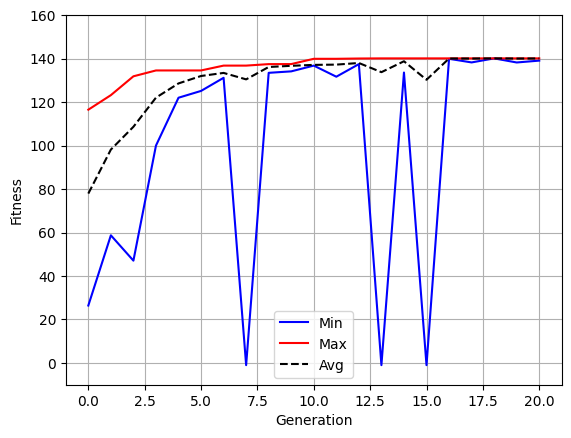

In [53]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = math.sqrt(x[0]**2 + x[1]**2)
    return res,

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    #ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Si definimos `N` como el número de generaciones, `P` como el número de individuos de la población y `T` como el tiempo que tarda en ejecutarse la función objetivo, el tiempo total para obtener la solución al problema es `Ttotal = N x P x T` (calcula 100 individuos con 100 generaciones y 1 segundo en procesar la función objetivo) -> Existen mecanismos para evaluar los individuos de la población en paralelo.

#### 7. Para seguir aprendiendo

[Holland 1992](https://github.com/yyccR/papers/blob/master/genetic%20algorithm/%E3%80%8AAdaptation%20in%20Natural%20and%20Artificial%20Systems%E3%80%8BJohn%20Holland%201992.pdf)

[Goldberg 2006](http://www2.fiit.stuba.sk/~kvasnicka/Free%20books/Goldberg_Genetic_Algorithms_in_Search.pdf)

[Ser, J.D. et al. 2019](https://www.sciencedirect.com/science/article/pii/S2210650218310277)

1.- Encontrar los máximos de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$

2.- Dada la [Función de Rastringin](https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph.), con A = 10 y  $$\{xi\} \in [-5.12,5.12]$$

Implementa dicha función en Python y minimízala para n=10

Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos